Проверка центральной предельной теоремы для непрерывного распределения

In [2]:
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt
%matplotlib inline

# Бета-распределение

Задается плотностью вероятности

$$f(x) = \frac{1}{B(\alpha,\beta)}x^{\alpha-1}(1-x)^{\beta-1}$$

Где $\alpha, \beta > 0$ - фиксированные параметры, а $B(\alpha, \beta)$ - бета-функция.

Задается бета-распределние с параметрами $\alpha = 7, \beta = 3$ и получается выборка размером 1000 из случайной величины, распределенной по закону $X\!\sim \mathrm {B} (7, 3)$. 

In [3]:
a, b = 7, 3

beta_rv = sts.beta(a, b)
sample = beta_rv.rvs(1000)

Первые 10 значений выборки для наглядности:

In [4]:
sample[:10]

array([0.64886411, 0.68652674, 0.81699862, 0.84159993, 0.72612499,
       0.76650326, 0.95746007, 0.888704  , 0.84904444, 0.52902388])

Ниже построена гистограмма выборки sample, поверх нее (желтая линия) теоретическая плотность распределения той же случайной величины.

Text(0.5, 0, '$x$')

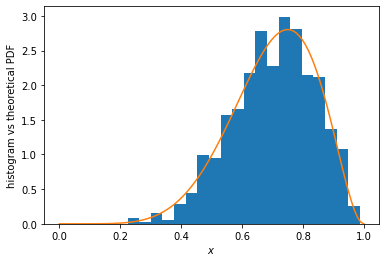

In [5]:
plt.hist(sample, density=True, bins = 20)

x = np.linspace(0,1,100)
pdf = beta_rv.pdf(x)
plt.plot(x, pdf)

plt.ylabel('histogram vs theoretical PDF')
plt.xlabel('$x$')

# Параметры исходного распределения

Подсчитаем среднее и среднеквадратичное отклонение бета-распределния по следующим формулам:

$$E[X] = \frac{\alpha}{\alpha + \beta}$$

$$D[X] = \frac{\alpha\beta}{(\alpha + \beta)^{2}(\alpha + \beta + 1)}$$

In [6]:
m = a / (a + b)
D = a*b / (a+b)**2 / (a+b+1)
sigma = np.sqrt(D)

m, sigma

(0.7, 0.13816985594155148)

# Проверка центральной предельной теоремы


Ниже будут сгенерированы по 1000 выборок из ```sample```, размерами 5, 20 и 50 соответственно. 

Для набора выборок каждого размера будет высчитываться среднее значение. По 1000 средних значений этих выборок построена гистограмма. Поверх нее (желтая линия) отображается график плотности вероятности нормального распределения с параметрами, равными параметрам исходного бета-распределения (```m``` и ```sigma``` из ячейки выше).

В задании рекомендовалось нормализовать гистограмму с помощью указания параметра ```normed=True```, что в моем случае вызывает ошибку. По этой причине нормализация выполнялась за счет масштабирования параметра ```scale``` у нормального распределнения.

Без такого допущения графики плотности распределения выглядели как зеленая линия на графике ниже.

(0.4, 0.9)

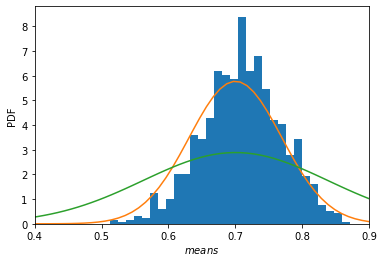

In [141]:
n = 5
all_samples_of_n = []
for i in range(1000):
    all_samples_of_n.append(np.random.choice(sample, n))
means = np.array([s.mean() for s in all_samples_of_n])  
plt.hist(means, density=True, bins = 30)
plt.ylabel('PDF')
plt.xlabel('$mean$')    

x = np.linspace(0,1,100)
norm_rv = sts.norm(loc=m, scale = sigma/2)
pdf = norm_rv.pdf(x)
plt.plot(x, pdf)

norm_rv_unscaled = sts.norm(loc=m, scale = sigma)
pdf = norm_rv_unscaled.pdf(x)
plt.plot(x, pdf)

plt.xlim(0.4,0.9)

# Сравнение теоретических и статистических параметров

In [142]:
# среднее бета-распределения и среднее из 1000 значений средних в выборках по 5
# достаточно точное приближение
m, means.mean()

(0.7, 0.7093804354859607)

In [143]:
# среднеквадратичное отклонение бета-распределения и отклонение в 1000 значений средних в выборках по 5
# sigma/2 для учета масштабирования, проведенного ранее
# именно такое значение мы передавали в параметр scale нормального распределения
# пока приближение не совсем точное
sigma/2, np.std(means)

(0.06908492797077574, 0.059025672599985396)

Проделаем то же самое, увеличив размер выборок до 20:

(0.6, 0.8)

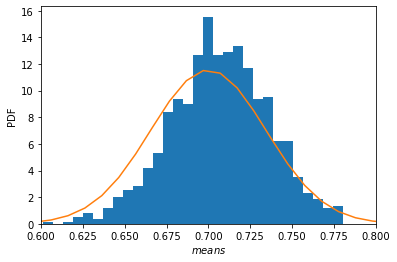

In [164]:
n = 20
all_samples_of_n = []
for i in range(1000):
    all_samples_of_n.append(np.random.choice(sample, n))
means = np.array([s.mean() for s in all_samples_of_n])    
plt.hist(means, density=True, bins = 30)
plt.ylabel('PDF')
plt.xlabel('$mean$') 

x = np.linspace(0,1,100)
norm_rv = sts.norm(loc=m, scale = sigma/4)
pdf = norm_rv.pdf(x)
plt.plot(x, pdf)

plt.xlim(0.6,0.8)

In [165]:
# среднее бета-распределения и среднее из 1000 значений средних в выборках по 20
# более точное приближение, чем при выборках размером 5
m, means.mean()

(0.7, 0.7064896959379441)

In [166]:
# среднеквадратичное отклонение бета-распределения и отклонение в 1000 значений средних в выборках по 20
# в параметр scale нормального распределения передавали sigma/4
# приближение точнее, чем при выборках размером 5, но все еще не слишком точное
sigma/4, np.std(means)

(0.03454246398538787, 0.029235333379101065)

Повторим операции ещё раз для выборок размером в 50:

(0.6, 0.8)

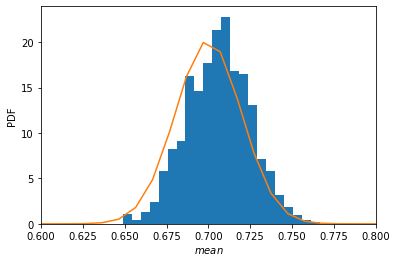

In [169]:
n = 50
all_samples_of_n = []
for i in range(1000):
    all_samples_of_n.append(np.random.choice(sample, n))
means = np.array([s.mean() for s in all_samples_of_n])    
plt.hist(means, density=True, bins = 22)
plt.ylabel('PDF')
plt.xlabel('$mean$') 

x = np.linspace(0,1,100)
norm_rv = sts.norm(loc=m, scale = sigma/7)
pdf = norm_rv.pdf(x)
plt.plot(x, pdf)
plt.xlim(0.6,0.8)

In [162]:
# среднее бета-распределения и среднее из 1000 значений средних в выборках по 50
# достаточное точное приближение, но по точности сравнимо со средним при n=20
m, means.mean()

(0.7, 0.7067967763953095)

In [170]:
# среднеквадратичное отклонение бета-распределения и отклонение в 1000 значений средних в выборках по 50
# в параметр scale нормального распределения передавали sigma/7
# наиболее точное приближение отклонения из трёх
sigma/7, means.std()

(0.019738550848793068, 0.018909732690111807)

# Вывод

Была проверена работа центральной предельной теоремы. Действительно, распределение выборочных средних близко к нормальному, а значения его среднего и дисперсии достаточно хорошо приближают параметры исходного распределения. Точность приближения зависит от размера выборки, по которой будет считаться среднее. При n < 30 результаты не совсем точные, их точность повышается с увеличением n.